# BERT



***



## Task 1: Extracting Embeddings With BERT

In the first task, you will experiment with subword tokenization and using BERT (Bidirectional Encoder Representations from Transformers) to extract contextualized token embeddings.

In [1]:
!pip install transformers

from transformers import BertModel, BertTokenizerFast
from tqdm.notebook import tqdm
import transformers
import torch
import numpy as np
import json

<div style="position:relative;padding:.75rem 1.25rem;margin-bottom:1rem;border:1px solid transparent;border-radius:.25rem;background-color:#dae8fc;border-color:#6c8ebf;color:#0c5460">
<b>Step 1: Load Model and Tokenizer</b> 
</div>

Please load the *BERTModel* and *BertTokenizer* with pretrained weights from the **HuggingFace API**: https://huggingface.co/bert-base-uncased. Here, you can read more about how to use the Transformers package to load and use BERT: https://huggingface.co/docs/transformers/model_doc/bert.

In [2]:
# Define tokenizer 
tokenizer_bert = BertTokenizerFast.from_pretrained("bert-base-uncased")

# Download model with pretrained weights 
model_bert = BertModel.from_pretrained("bert-base-uncased")

# Set model to evaluation mode
model_bert.eval()

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
  

<div style="position:relative;padding:.75rem 1.25rem;margin-bottom:1rem;border:1px solid transparent;border-radius:.25rem;background-color:#dae8fc;border-color:#6c8ebf;color:#0c5460">
<b>Step 2: Experiment with Tokenization</b> 
</div>

To process an input sentence through a model like BERT, it's necessary to segment the sentence into individual tokens and convert them into a list of integers representing their respective token IDs in the vocabulary. To gain a more in-depth understanding of BERT's tokenizer functionality, please implement the following steps:

1. Print the list of five special tokens utilized by [BERT's tokenizer](https://huggingface.co/docs/transformers/model_doc/bert#transformers.BertTokenizer), ensuring you comprehend their purpose.
2. Employ the tokenizer to encode the word `king` and display the corresponding token IDs.
3. Next, use the tokenizer to encode the sentence `A kingfisher was spotted near the lake.`. Convert these token IDs back to their respective tokens and print the outcome. Provide a brief description of your observations.

In [3]:
# Print the list of special tokens
tokenizer_bert.all_special_tokens

['[UNK]', '[SEP]', '[PAD]', '[CLS]', '[MASK]']

In [4]:
# Encode word and print input ids
tokenizer_bert.encode("king")
#tokenizer_bert.convert_tokens_to_ids("king") --> 2332
#tokenizer_bert.convert_ids_to_tokens(101) --> [CLS] special token.
#tokenizer_bert.convert_ids_to_tokens(102) --> [SEP] special token.

[101, 2332, 102]

In [5]:
# Print tokenized sentence
test_sentence = "A kingfisher was spotted near the lake."
tokenizer_bert.tokenize(test_sentence)

['a', 'king', '##fish', '##er', 'was', 'spotted', 'near', 'the', 'lake', '.']

**Your observations:**

One interesting point is that when encoding a token, the encoded word is printed "sandwiched" between 101 and 102. 101 turns out to be the [CLS] special token, and 102 is the [SEP] special token. convert_tokens_to_ids does not print out these special tokens, however.
model.tokenize showed in this case that the token "kingfisher" was tokenized into three separate tokens, tokens that were already available to the tokenizer. The hash symbols show that they are one single unit. This system allows the model to unnecessarily mark tokens as [UNK], which will result in a loss of valuable information in the larger scale.

<div style="position:relative;padding:.75rem 1.25rem;margin-bottom:1rem;border:1px solid transparent;border-radius:.25rem;background-color:#dae8fc;border-color:#6c8ebf;color:#0c5460">
<b>Step 3: Extract Embedding</b> 
</div>

Now use the model to return a word embedding for `King`: Encode the word, convert it into a tensor, and take the *last_hidden_state* as word representation. Also calculate the word embedding for `King` by averaging hidden states of BERT's last four layers. A detailed introduction on how to work with BERT embeddings from different layers is provided at https://mccormickml.com/2019/05/14/BERT-word-embeddings-tutorial/.

In [6]:
# Extract exemplary embedding of "king"
# Extract ids and create tensors
encoded = tokenizer_bert.encode(text = "king", return_tensors = "pt")

# Pass pre-preprocessed data to BERT and get output (use "last_hidden_state as representations for single words")
output = model_bert(encoded, output_hidden_states=True)

# We get three vectors: first and third vector representes start/stop token. 
# Middle vector represents word
output.last_hidden_state

tensor([[[-0.1318,  0.1997,  0.0593,  ..., -0.1656, -0.0187, -0.0151],
         [-0.1006, -0.0524,  0.0772,  ..., -0.2972, -0.1973, -0.6630],
         [ 0.8228,  0.2570, -0.2939,  ..., -0.0014, -0.8282, -0.2063]]],
       grad_fn=<NativeLayerNormBackward0>)

In [7]:
# Print averaged embedding for word based on last four layers
four_layers = output.hidden_states[-4:]
avg = torch.stack(four_layers).mean(dim=0)
print(avg)

tensor([[[-8.7566e-01, -1.7458e-01, -3.8263e-01,  ..., -1.2198e-01,
          -2.6616e-01, -2.6486e-03],
         [-4.2331e-01, -1.8018e-02, -1.4058e-01,  ..., -5.9514e-01,
          -4.3966e-01, -1.0561e+00],
         [ 2.1808e-01,  6.8939e-02, -9.0763e-02,  ..., -5.2305e-04,
          -2.5508e-01, -6.4267e-02]]], grad_fn=<MeanBackward1>)


## Task 2: Ambiguous Words in the English Language

Now that you're familiar with using BERT for generating token embeddings, let's explore how well BERT handles ambiguous words. Ambiguity in language arises when a single word has multiple interpretations depending on the context. For instance, the word 'bat' can refer to an animal or a sports equipment used in games like cricket and baseball. Similarly, 'bank' might denote a financial institution or the side of a river. 

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import gensim
import json
import re

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [9]:
# Read article data
with open("/kaggle/input/newsa6/relevant_sent.json","rb") as d:
    sentences = json.load(d)

In [10]:
print(sentences[0])

{'_id': 1145455, 'docID': 197727, 'senDocID': 0, 'text': 'Headlines about the utter madness of our housing market dominated 2015.'}


<div style="position:relative;padding:.75rem 1.25rem;margin-bottom:1rem;border:1px solid transparent;border-radius:.25rem;background-color:#dae8fc;border-color:#6c8ebf;color:#0c5460">
<b>Step 1: Find Mentions of Run</b> 
</div>

The word `run` is considered to be the most ambiguous word in the 
English language, so it is a good test to see how well BERT handles 
ambiguity. Extract 200 sentences containing the word "run" from the news 
corpus by implementing the following steps:

* First, look up the token ID of "run". 
* Subsequently, iterate over the sentences in the corpus to identify sentences containing that token ID.


In [11]:
# Get the vocabulary ID of the token
tokenizer_bert.convert_tokens_to_ids("run")

2448

In [12]:
run_sentences = []
run_token_id = tokenizer_bert.convert_tokens_to_ids("run")
count = 0
for entry in tqdm(sentences, desc="s"):
    sentence = entry.get("text", "")

    # Tokenize the sentence
    tokens = tokenizer_bert(sentence, return_tensors="pt", truncation=True)

    # Check if the token ID of "run" is present
    if count < 200:
        if run_token_id in tokens["input_ids"].tolist()[0]:
            run_sentences.append(sentence)
            count += 1
# Extract 200 sentences (or less if the corpus is smaller)
extracted_sentences = run_sentences[:200]

# Print or process the extracted sentences as needed


s:   0%|          | 0/1837142 [00:00<?, ?it/s]

In [13]:
print(extracted_sentences[:5])

['But rather than accept that municipal housing, run by councils or housing associations, is a necessary and prudent investment that prevents far more costly homelessness, the government has focused on private home ownership that only benefits the already comfortable.', 'In the long term, selling off social housing at a heavy discount and over-inflating prices on new-build properties while helping people take a step on to a rung of an increasingly precarious housing ladder hurts more people than it helps.', 'But politics has been staging a festive diversion for some months now, and the pantomime playing out on the opposition benches looks set to run throughout the coming year.', 'Too many borrowed garments, or just the end of a long and successful run?', 'During the run-up to Tony Blair’s first Christmas as prime minister, in December 1997, my former boss Paddy Ashdown warned that the public was “simply bewildered” to see Labour sweep to power and then remove welfare payments for singl

<div style="position:relative;padding:.75rem 1.25rem;margin-bottom:1rem;border:1px solid transparent;border-radius:.25rem;background-color:#dae8fc;border-color:#6c8ebf;color:#0c5460">
<b>Step 2: Extract and Visualize Token Embeddings</b> 
</div>

Use BERT to create embeddings for all words in these 200 
sentences, then plot a 2-dimensional PCA projection in which you 
highlight embeddings for "run" in a different color.


In [14]:
word_embeddings = []
run_embeddings = []
all_tokens = []
for sentence in tqdm(extracted_sentences, desc="s"):
    tokens = tokenizer_bert(sentence, return_tensors="pt", truncation=True)
    outputs = model_bert(**tokens)
    last_hidden_states = outputs.last_hidden_state
    word_embeddings.extend(last_hidden_states[0].detach().numpy())
    all_tokens.extend(tokenizer_bert.convert_ids_to_tokens(tokens["input_ids"].tolist()[0]))
    # Identify and save the embedding for the word "run"
    run_token_index = tokens["input_ids"][0].tolist().index(tokenizer_bert.convert_tokens_to_ids("run"))
    run_embedding = last_hidden_states[0][run_token_index].detach().numpy()
    run_embeddings.append(run_embedding)


s:   0%|          | 0/200 [00:00<?, ?it/s]

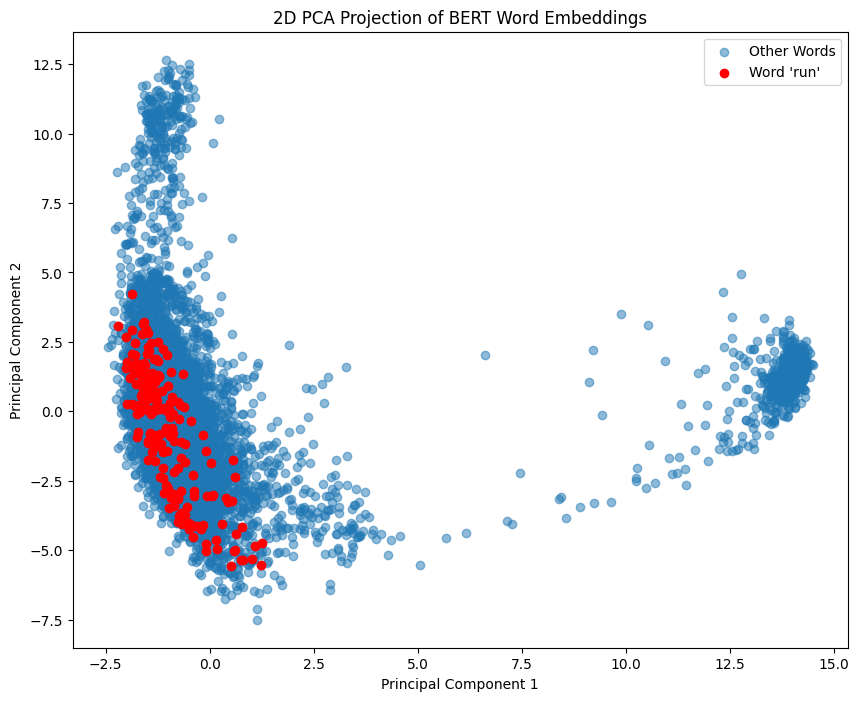

In [15]:
pca = PCA(n_components=2)
word_embeddings_pca = pca.fit_transform(word_embeddings)
run_embeddings_pca = pca.transform(run_embeddings)

# Plot the 2D PCA projection
plt.figure(figsize=(10, 8))
plt.scatter(word_embeddings_pca[:, 0], word_embeddings_pca[:, 1], alpha=0.5, label="Other Words")
plt.scatter(run_embeddings_pca[:, 0], run_embeddings_pca[:, 1], color="red", label="Word 'run'")
plt.title("2D PCA Projection of BERT Word Embeddings")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

<div style="position:relative;padding:.75rem 1.25rem;margin-bottom:1rem;border:1px solid transparent;border-radius:.25rem;background-color:#dae8fc;border-color:#6c8ebf;color:#0c5460">
<b>Step 3: Identify Different Meanings of "Run"</b> 
</div>

Utilize the plot of projected embeddings and nearest neighbor search in the embedding space to pinpoint 10 distinct meanings of 'run' through association. For the first 10 instances of 'run,' identify the most similar words by comparing their embeddings using cosine similarity to all other words in the 200 sentences. Then, list the 5 words that are most similar for each of the 10 mentions of "run". Can you identify distinct meanings?

Instance 1 of 'run':
   Most similar words: run, run, run, run, run
Instance 2 of 'run':
   Most similar words: run, run, ##g, ##g, of
Instance 3 of 'run':
   Most similar words: run, run, run, run, run
Instance 4 of 'run':
   Most similar words: run, successful, a, long, run
Instance 5 of 'run':
   Most similar words: run, run, run, run, run
Instance 6 of 'run':
   Most similar words: run, run, stir, run, run
Instance 7 of 'run':
   Most similar words: run, run, run, run, run
Instance 8 of 'run':
   Most similar words: run, help, run, run, run
Instance 9 of 'run':
   Most similar words: run, out, run, run, run
Instance 10 of 'run':
   Most similar words: run, run, run, for, run


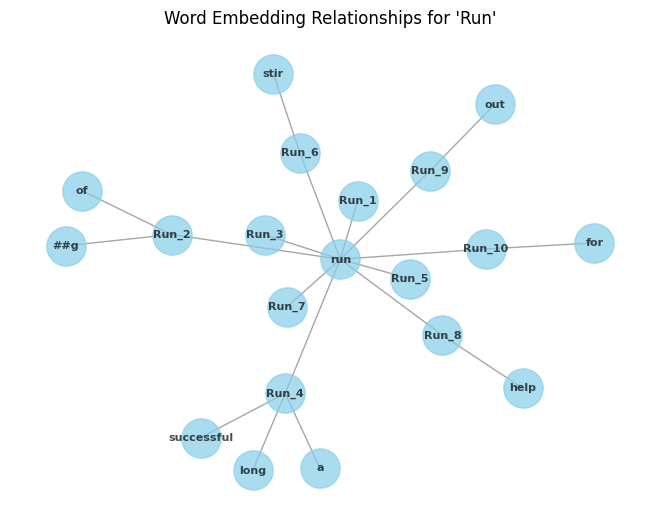

In [16]:
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

def calculate_cosine_similarity(vec1, vec2):
    return cosine_similarity([vec1], [vec2])[0][0]

def find_most_similar_words(run_embedding, all_embeddings, all_tokens, top_k=5):
    similarities = [calculate_cosine_similarity(run_embedding, emb) for emb in all_embeddings]
    top_indices = sorted(range(len(similarities)), key=lambda i: similarities[i], reverse=True)[:top_k]
    most_similar_words = [all_tokens[i] for i in top_indices]
    return most_similar_words

# Create a graph
G = nx.Graph()

for i in range(10):
    # Get the most similar words for the i-th instance of 'run'
    most_similar_words = find_most_similar_words(run_embeddings[i], word_embeddings, all_tokens)

    # Add nodes and edges to the graph
    G.add_node(f"Run_{i+1}")
    for word in most_similar_words:
        G.add_node(word)
        G.add_edge(f"Run_{i+1}", word)

    print(f"Instance {i+1} of 'run':")
    print(f"   Most similar words: {', '.join(most_similar_words)}")
# Draw the graph
pos = nx.spring_layout(G, seed=42)  # You can try different layout algorithms
nx.draw(G, pos, with_labels=True, font_size=8, node_size=800, font_color="black", node_color="skyblue", edge_color="gray", font_weight="bold", alpha=0.7)
plt.title("Word Embedding Relationships for 'Run'")
plt.show()


<div style="position:relative;padding:.75rem 1.25rem;margin-bottom:1rem;border:1px solid transparent;border-radius:.25rem;background-color:#dae8fc;border-color:#6c8ebf;color:#0c5460">
<b>Step 4: Comparison with Word2vec</b> 
</div>

"Repeat" the above in word2vec by computing embeddings from a pre-trained model of all words in the 200 sentences and plotting a 2-dimensional PCA projection. Discuss your results.

In [17]:
# Load Word2Vec model
import gensim.downloader

model_w2v = gensim.downloader.load('word2vec-google-news-300')

[=================================================-] 99.8% 1660.0/1662.8MB downloaded


In [18]:
# Get embeddings
word_embeddings_w2v = []
run_embeddings_w2v = []
all_tokens_w2v = []
for sentence in tqdm(extracted_sentences, desc="s"):
    sentence = sentence.lower().split()
    for word in sentence:
        try:
            if word == "run":
                embedding = model_w2v[''.join(e for e in word if e.isalnum())]
                run_embeddings_w2v.append(embedding)
                all_tokens_w2v.append(word)
            else:
                embedding = model_w2v[''.join(e for e in word if e.isalnum())]
                word_embeddings_w2v.append(embedding)
                all_tokens_w2v.append(word)
        except KeyError:
            print(f"{word} is not present in the model.")
        

s:   0%|          | 0/200 [00:00<?, ?it/s]

a is not present in the model.
and is not present in the model.
a is not present in the model.
and is not present in the model.
a is not present in the model.
to is not present in the model.
a is not present in the model.
of is not present in the model.
a is not present in the model.
and is not present in the model.
to is not present in the model.
of is not present in the model.
a is not present in the model.
and is not present in the model.
to is not present in the model.
blair’s is not present in the model.
1997, is not present in the model.
ashdown is not present in the model.
to is not present in the model.
labour is not present in the model.
to is not present in the model.
and is not present in the model.
of is not present in the model.
a is not present in the model.
westminster-based is not present in the model.
and is not present in the model.
to is not present in the model.
a is not present in the model.
defences is not present in the model.
to is not present in the model.
a is

In [19]:
print(len(word_embeddings_w2v))
print(len(run_embeddings_w2v))
print(len(all_tokens_w2v))

5291
140
5431


In [20]:
# PCA
pca = PCA(n_components=2)
word_embeddings_w2v_pca = pca.fit_transform(word_embeddings_w2v)
run_embeddings_w2v_pca = pca.transform(run_embeddings_w2v)

In [21]:
print(run_embeddings_w2v_pca[0])
print(run_embeddings_w2v_pca[15])
print(run_embeddings_w2v_pca[139])
print(len(run_embeddings_w2v_pca))

[-0.14143156 -0.0084485 ]
[-0.14143156 -0.0084485 ]
[-0.14143156 -0.0084485 ]
140


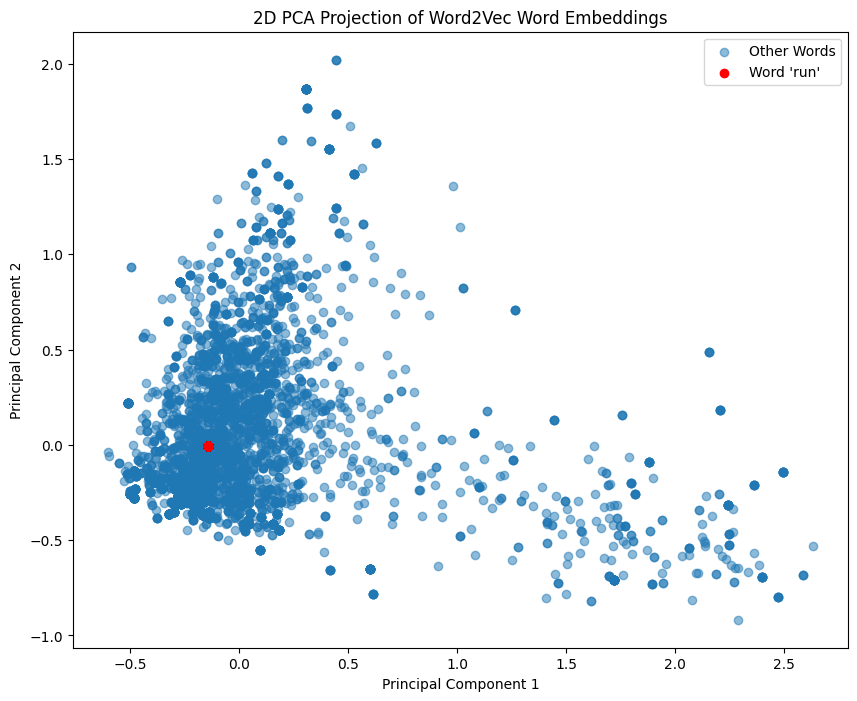

In [22]:
# Create scatter plot with projected embeddings
plt.figure(figsize=(10, 8))
plt.scatter(word_embeddings_w2v_pca[:, 0], word_embeddings_w2v_pca[:, 1], alpha=0.5, label="Other Words")
plt.scatter(run_embeddings_w2v_pca[:, 0], run_embeddings_w2v_pca[:, 1], color="red", label="Word 'run'")
plt.title("2D PCA Projection of Word2Vec Word Embeddings")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()


In [23]:
import numpy as np
# Calculate Euclidean distance between 'run' and all other words
distances = np.linalg.norm(word_embeddings_w2v_pca - run_embeddings_w2v_pca[0], axis=1)

# Extract the indices of the top 5 closest neighbors
closest_indices = np.argsort(distances)[:5]

# Display the closest neighbors with words
print("Closest 5 neighbors:")
for idx in closest_indices:
    print(f"The word \"{all_tokens_w2v[idx]}\" at index {idx} has an Euclidean Distance with the word \"run\" of: {distances[idx]}")

Closest 5 neighbors:
The word "it" at index 487 has an Euclidean Distance with the word "run" of: 7.110886191803315e-05
The word "our" at index 604 has an Euclidean Distance with the word "run" of: 7.110886191803315e-05
The word "job," at index 1018 has an Euclidean Distance with the word "run" of: 7.110886191803315e-05
The word "the" at index 352 has an Euclidean Distance with the word "run" of: 7.110886191803315e-05
The word "certain" at index 419 has an Euclidean Distance with the word "run" of: 7.110886191803315e-05


**Discuss your results:**
The difference between BERT and Word2Vec is extremely apparent. First of all, the 2D PCA Projection of both models show a great difference. BERT's result, shows various instances of the word "run" as different vectors. This makes sense as BERT takes "context" into account, after which the same token might be encoded with different vectoral values. All of the red dots refer to the token "run".
This difference is striking for the Word2Vec model. As we can see, the 2D PCA Projection has a single vector for the token "run". However, this is the vectoral value for 140 instances of the token "run", which are all the same. This is due to the fact that, Word2Vec sets a single vector for a single token, without taking the "context" into account.
This phenomenon is also apparent in the 5 nearest neighbours for 10 instances for the token "run", for BERT. As you can see, although most of the neighbours are other instances of "run", there are also other tokens included. Results like "stir" and "help" are clearly different semantic contexts. "out" could be the result of "to run out", and "a" + "long" + "successful" could be a race of a business, which was ran successfully, and also for a long period of time. This shows that BERT does not accept "run", always as the action that is the quicker version of "walking".
We utilized the Euclidean Distance for the nearest neighbours for Word2Vec, which gave us the 5 nearest neighbours to the token "run". Unline BERT's results, these results don't really tell that much. We believe that due to co-occurance, they have similar 2D PCA Projections. The distances look to be the same, but we believe this is due to the Projection being extremely compact. Other distance measurements might show clearer distance results.

## Task 3: Document Classification

In this task, you will train BERT to classify a sample of articles by news outlet.

In [24]:
from transformers import BertTokenizerFast, BertForSequenceClassification
from torch.utils.data import DataLoader,TensorDataset,RandomSampler,SequentialSampler # For pre-processing and sampling the data while fine-tuning
from sklearn.model_selection import train_test_split # To split the data into train and test sample
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from torch.optim import AdamW
import plotly.express as px
import pandas as pd
import numpy as np
import torch
import json

from tqdm.notebook import tqdm
import transformers


In [25]:
# Load article data
with open("/kaggle/input/newsb6/relevant_articles.json","rb") as d:
    articles = json.load(d)

In [26]:
# List of outlets
all_outlets = ['guardian','bbc','telegraph','HuffingtonUK', 'cbs','HuffingtonUS','WP','Fox','AP']

<div style="position:relative;padding:.75rem 1.25rem;margin-bottom:1rem;border:1px solid transparent;border-radius:.25rem;background-color:#dae8fc;border-color:#6c8ebf;color:#0c5460">
<b>Step 1: Preprocessing</b> 
</div>

You first need to filter articles based on respective news outlets and sample 1000 articles for each class for a total dataset of 8000 examples. Then split the data into a training and test set comprising 90% and 10% of the data, respectively.
Use the pre-defined list of news outlets to do the filtering. Feel free to experiment with larger training sets.

(*Hint:* Use *[LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)* to map the outlets to integer values and use *[train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)* from sklearn and stratify your sample according to the article labels to keep labels balanced.)



In [27]:
# Convert to dataframe
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df = pd.DataFrame(articles)

In [28]:
# Filter articles based on the news outlets (Hint: use the "feed" key)
filtered_df = df[df['feed'].isin(all_outlets)]
filtered_df.head()

,_id,url,title,feed,type,pub,ret,lang,refs,sum,body,text,auth
0,197727,http://www.theguardian.com/housing-network/201...,Five steps to fixing the UK housing crisis in ...,guardian,politics,{'$date': '2016-01-01T09:12:27.000+0000'},{'$date': '2016-01-01T09:27:32.000+0000'},en,[http://www.theguardian.com/commentisfree/2015...,Headlines about the utter madness of our housi...,Perhaps in years to come 2015 will be remember...,Headlines about the utter madness of our housi...,NaN
1,197728,http://www.theguardian.com/commentisfree/2016/...,That’s enough assessments of 2015. It’s time t...,guardian,politics,{'$date': '2016-01-01T09:37:06.000+0000'},{'$date': '2016-01-01T09:47:42.000+0000'},en,"[http://www.theguardian.com/business/davos, ht...",From Strictly Come Dancing featuring Vladimir ...,• Jeremy Corbyn turns down invitation to atten...,From Strictly Come Dancing featuring Vladimir ...,NaN
2,197995,http://www.theguardian.com/politics/2016/jan/0...,The paperback memoirs of Miss Rice-Davies : ar...,guardian,politics,{'$date': '2016-01-01T05:00:22.000+0000'},{'$date': '2016-01-01T22:59:09.000+0000'},en,[http://www.theguardian.com/politics/2014/dec/...,1 January 1964 : The Mandy Report turns out to...,"Miss Mandy Rice-Davies, one of 1963’s better k...",1 January 1964 : The Mandy Report turns out to...,NaN
3,198038,http://www.bbc.co.uk/news/uk-scotland-35210821...,'Very drunk' patient numbers revealed,bbc,politics,{'$date': '2016-01-02T00:42:46.000+0000'},{'$date': '2016-01-02T00:45:47.000+0000'},en,[http://www.bbc.co.uk/news/uk-scotland-35097230],Ambulances attend more than 60 incidents on av...,"Paramedics treated about 12,000 people who wer...",Ambulances attend more than 60 incidents on av...,NaN
4,198046,http://www.bbc.co.uk/news/uk-35212696#sa-ns_mc...,Littering fines set to rise to £150,bbc,politics,{'$date': '2016-01-02T04:28:41.000+0000'},{'$date': '2016-01-02T04:47:52.000+0000'},en,[http://www.telegraph.co.uk/news/politics/1206...,Penalties for people who drop litter could rea...,"According to the Daily Telegraph, the minimum ...",Penalties for people who drop litter could rea...,NaN


In [29]:
# Encode feed as integer values for training
label_encoder = LabelEncoder()
filtered_df['label'] = label_encoder.fit_transform(filtered_df['feed'])

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/tmp/ipykernel_27/952202839.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['label'] = label_encoder.fit_transform(filtered_df['feed'])


In [30]:
# Create a new column 'article_text' using 'body' if it exists, otherwise use 'text'
filtered_df['article_text'] = filtered_df['body'].fillna(filtered_df['text'])
filtered_df.head()

/tmp/ipykernel_27/2488135759.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['article_text'] = filtered_df['body'].fillna(filtered_df['text'])


,_id,url,title,feed,type,pub,ret,lang,refs,sum,body,text,auth,label,article_text
0,197727,http://www.theguardian.com/housing-network/201...,Five steps to fixing the UK housing crisis in ...,guardian,politics,{'$date': '2016-01-01T09:12:27.000+0000'},{'$date': '2016-01-01T09:27:32.000+0000'},en,[http://www.theguardian.com/commentisfree/2015...,Headlines about the utter madness of our housi...,Perhaps in years to come 2015 will be remember...,Headlines about the utter madness of our housi...,NaN,6,Perhaps in years to come 2015 will be remember...
1,197728,http://www.theguardian.com/commentisfree/2016/...,That’s enough assessments of 2015. It’s time t...,guardian,politics,{'$date': '2016-01-01T09:37:06.000+0000'},{'$date': '2016-01-01T09:47:42.000+0000'},en,"[http://www.theguardian.com/business/davos, ht...",From Strictly Come Dancing featuring Vladimir ...,• Jeremy Corbyn turns down invitation to atten...,From Strictly Come Dancing featuring Vladimir ...,NaN,6,• Jeremy Corbyn turns down invitation to atten...
2,197995,http://www.theguardian.com/politics/2016/jan/0...,The paperback memoirs of Miss Rice-Davies : ar...,guardian,politics,{'$date': '2016-01-01T05:00:22.000+0000'},{'$date': '2016-01-01T22:59:09.000+0000'},en,[http://www.theguardian.com/politics/2014/dec/...,1 January 1964 : The Mandy Report turns out to...,"Miss Mandy Rice-Davies, one of 1963’s better k...",1 January 1964 : The Mandy Report turns out to...,NaN,6,"Miss Mandy Rice-Davies, one of 1963’s better k..."
3,198038,http://www.bbc.co.uk/news/uk-scotland-35210821...,'Very drunk' patient numbers revealed,bbc,politics,{'$date': '2016-01-02T00:42:46.000+0000'},{'$date': '2016-01-02T00:45:47.000+0000'},en,[http://www.bbc.co.uk/news/uk-scotland-35097230],Ambulances attend more than 60 incidents on av...,"Paramedics treated about 12,000 people who wer...",Ambulances attend more than 60 incidents on av...,NaN,5,"Paramedics treated about 12,000 people who wer..."
4,198046,http://www.bbc.co.uk/news/uk-35212696#sa-ns_mc...,Littering fines set to rise to £150,bbc,politics,{'$date': '2016-01-02T04:28:41.000+0000'},{'$date': '2016-01-02T04:47:52.000+0000'},en,[http://www.telegraph.co.uk/news/politics/1206...,Penalties for people who drop litter could rea...,"According to the Daily Telegraph, the minimum ...",Penalties for people who drop litter could rea...,NaN,5,"According to the Daily Telegraph, the minimum ..."


In [31]:
samples_per_group_dict = {0: 1000,
                          1: 1000, 
                          2: 1000,
                         3: 1000,
                         4: 1000,
                         5: 1000,
                         6: 1000,
                         7: 1000}

In [32]:
output = filtered_df.groupby('label').apply(lambda group: group.sample(samples_per_group_dict[int(group.name)])).reset_index(drop=True)

In [33]:
output

,_id,url,title,feed,type,pub,ret,lang,refs,sum,body,text,auth,label,article_text
0,426146,http://hosted.ap.org/dynamic/stories/U/US_2016...,"Delegate math : Clinton wins, and how AP count...",AP,politics,{'$date': '2016-06-07T01:00:08.000+0000'},{'$date': '2016-06-07T01:00:08.000+0000'},en,[http://elections.ap.org/content/delegate-trac...,NaN,NaN,WASHINGTON (AP) -- Lifted by a big win in Puer...,HOPE YEN,0,WASHINGTON (AP) -- Lifted by a big win in Puer...
1,887662,http://hosted.ap.org/dynamic/stories/U/US_CONG...,Inquiry says Snowden in contact with Russia's ...,AP,politics,{'$date': '2016-12-22T15:10:23.080+0000'},{'$date': '2016-12-22T15:10:23.080+0000'},en,NaN,NaN,NaN,WASHINGTON (AP) -- A declassified report on a ...,RICHARD LARDNER,0,WASHINGTON (AP) -- A declassified report on a ...
2,291219,http://hosted.ap.org/dynamic/stories/U/US_PROF...,Connecticut governor to receive JFK Profile in...,AP,politics,{'$date': '2016-04-04T15:51:36.000+0000'},{'$date': '2016-04-04T15:51:36.000+0000'},en,NaN,NaN,NaN,"HARTFORD, Conn. (AP) -- Democratic Gov. Dannel...",NaN,0,"HARTFORD, Conn. (AP) -- Democratic Gov. Dannel..."
3,682390,http://hosted.ap.org/dynamic/stories/U/US_CART...,Carter: Nuke force changes are 'bearing fruit',AP,politics,{'$date': '2016-09-27T08:40:30.399+0000'},{'$date': '2016-09-27T08:40:30.399+0000'},en,NaN,NaN,NaN,"MINOT AIR FORCE BASE, N.D. (AP) -- Defense Sec...",ROBERT BURNS,0,"MINOT AIR FORCE BASE, N.D. (AP) -- Defense Sec..."
4,377648,http://hosted.ap.org/dynamic/stories/U/US_UNIT...,"Report : China has reclaimed 3,200 acres in So...",AP,politics,{'$date': '2016-05-13T18:49:27.000+0000'},{'$date': '2016-05-13T18:49:27.000+0000'},en,NaN,NaN,NaN,WASHINGTON (AP) -- A new Pentagon report says ...,LOLITA C. BALDOR,0,WASHINGTON (AP) -- A new Pentagon report says ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,524450,http://www.telegraph.co.uk/news/2016/07/20/rev...,Revealed : Rail companies' plans to track your...,telegraph,politics,{'$date': '2016-07-20T23:36:29.000+0000'},{'$date': '2016-07-22T02:49:04.000+0000'},en,NaN,NaN,NaN,Rail passengers could be forced to pay more to...,NaN,7,Rail passengers could be forced to pay more to...
7996,455002,http://www.telegraph.co.uk/news/2016/06/19/for...,Former college footballer convicted after enco...,telegraph,politics,{'$date': '2016-06-19T20:19:42.000+0000'},{'$date': '2016-06-19T20:28:29.000+0000'},en,[http://www.telegraph.co.uk/news/2016/06/11/br...,NaN,NaN,A former college football player is facing up ...,NaN,7,A former college football player is facing up ...
7997,563250,http://www.telegraph.co.uk/news/2016/08/10/too...,Too many strikes and you're out : unpopular tr...,telegraph,politics,{'$date': '2016-08-10T18:00:19.000+0000'},{'$date': '2016-08-10T19:09:35.000+0000'},en,NaN,NaN,NaN,Southern Rail passengers have been spared – fo...,NaN,7,Southern Rail passengers have been spared – fo...
7998,476358,http://www.telegraph.co.uk/news/2016/06/28/tee...,Teens hurl abuse at man on Manchester tram,telegraph,politics,{'$date': '2016-06-28T13:30:51.000+0000'},{'$date': '2016-06-28T13:41:48.000+0000'},en,NaN,NaN,NaN,A man has been the victim of a racist attack o...,NaN,7,A man has been the victim of a racist attack o...


In [34]:
# Split the data into training and testing sets
train_df, test_df = train_test_split(output, test_size=0.1, random_state=42, stratify=output['label'])

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [35]:
print(len(test_df))
print(len(train_df))

800
7200


<div style="position:relative;padding:.75rem 1.25rem;margin-bottom:1rem;border:1px solid transparent;border-radius:.25rem;background-color:#dae8fc;border-color:#6c8ebf;color:#0c5460">
<b>Step 2: Prepare Dataset for Training</b> 
</div>

Now that we have a test and training dataset, you need to prepare them for the use with PyTorch by implementing the following steps:

1. Tokenize the input using *[BertTokenizerFast](https://huggingface.co/docs/transformers/model_doc/bert#transformers.BertTokenizerFast)*.
2. Instantiate two *[DataLoader](https://pytorch.org/docs/stable/data.html)* objects for  the train and test datasets to allow processing in batches. 



In [36]:
# Encode/tokenize data 
train_encodings = tokenizer_bert(list(train_df['article_text']), truncation=True, padding=True, max_length=256, return_tensors='pt')
train_labels = torch.tensor(list(train_df['label']))
test_encodings = tokenizer_bert(list(test_df['article_text']), truncation=True, padding=True, max_length=256, return_tensors='pt')
test_labels = torch.tensor(list(test_df['label']))

In [37]:
# Training Parameters
batch_size = 16

In [38]:
# Convert inputs to a dataset objects
train_dataset = TensorDataset(train_encodings['input_ids'], train_encodings['attention_mask'], train_labels)
test_dataset = TensorDataset(test_encodings['input_ids'], test_encodings['attention_mask'], test_labels)

In [39]:
# Create dataloader
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

<div style="position:relative;padding:.75rem 1.25rem;margin-bottom:1rem;border:1px solid transparent;border-radius:.25rem;background-color:#dae8fc;border-color:#6c8ebf;color:#0c5460">
<b>Step 3: Fine-tune BERT</b> 
</div>

For fine-tuning, use the *[BERTForSequenceClassification](https://huggingface.co/docs/transformers/model_doc/bert#transformers.BertForSequenceClassification)* model from HuggingFace which includes an output layer with a 
classification layer. Fine-tune BERT for the task of multiclass classification on the training set and validate the performance on the test set. A detailed explanation on how to fine-tune BERT for text classification is provided at https://huggingface.co/docs/transformers/training. The solution for this part will be based on the section *Fine-tuning in native PyTorch*. Print the training and validation loss histories per epoch.

Use the following parameters for your first experiments:
- batch size = 16
- learning rate = 1e^-5
- AdamW optimizer
- fine-tuning for at least 3 epochs

You can also experiment with the parameters and your general fine-tuning setup once you have done your first experiments.

(*Hint: Don't forget to specify the number of classes while loading the model. By default, it will be set up for a binary classification.*)

In [40]:
import torch
from torch.utils.data import DataLoader
from transformers import BertForSequenceClassification, AdamW
from tqdm import tqdm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [41]:
# Define optimizer with learning rate
model_bert_seq = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(all_outlets))
optimizer = AdamW(model_bert_seq.parameters(), lr=1e-5)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/conda/lib/python3.10/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [42]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model_bert_seq.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [43]:
loss_fn = torch.nn.CrossEntropyLoss()

In [44]:
# Train function

def trainModel(model, dataloader, optimizer, device):
    model.train()
    total_loss = 0

    for batch in tqdm(dataloader, desc='Training'):
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        optimizer.step()

    avg_loss = total_loss / len(dataloader)
    return avg_loss

In [45]:
# Test function

def testModel(model, dataloader, device):
    model.eval()
    total_loss = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in tqdm(dataloader, desc='Testing'):
            input_ids, attention_mask, labels = batch
            input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            total_loss += loss.item()

            _, predicted = torch.max(outputs.logits, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    avg_loss = total_loss / len(dataloader)
    accuracy = accuracy_score(all_labels, all_preds)
    print(f'Test Loss: {avg_loss}, Accuracy: {accuracy}')
    return avg_loss

In [46]:
# Train for multiple epochs

train_loss_history = []
test_loss_history = []

epochs = 3    
for epoch in range(epochs):
    print(f'\nEpoch {epoch + 1}/{epochs}:')
    train_loss = trainModel(model_bert_seq, train_loader, optimizer, device)
    train_loss_history.append(train_loss)

    # Test the model on the validation set
    test_loss = testModel(model_bert_seq, test_loader, device)
    test_loss_history.append(test_loss)


Epoch 1/3:


Testing: 100%|██████████| 50/50 [00:05<00:00,  8.35it/s]


Test Loss: 0.8019532722234726, Accuracy: 0.74375

Epoch 2/3:


Testing: 100%|██████████| 50/50 [00:05<00:00,  8.35it/s]


Test Loss: 0.5337915372848511, Accuracy: 0.82625

Epoch 3/3:


Testing: 100%|██████████| 50/50 [00:05<00:00,  8.36it/s]

Test Loss: 0.4752032679319382, Accuracy: 0.84375


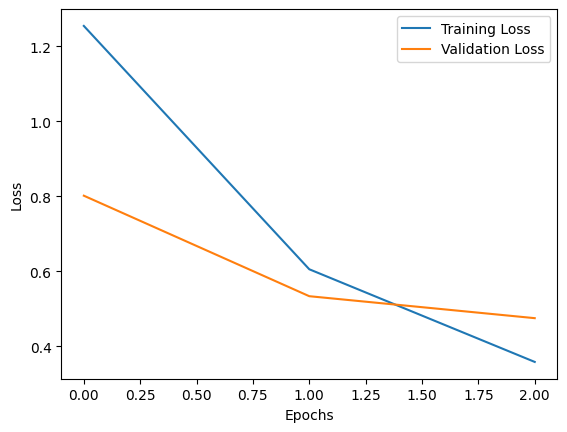

In [47]:
# Plot validation and train loss per epoch
plt.plot(train_loss_history, label='Training Loss')
plt.plot(test_loss_history, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<div style="position:relative;padding:.75rem 1.25rem;margin-bottom:1rem;border:1px solid transparent;border-radius:.25rem;background-color:#dae8fc;border-color:#6c8ebf;color:#0c5460">
<b>Step 4: Evaluate BERT after Fine-tuning</b> 
</div>

Evaluate the performance of your model by computing the accuracy of the classification on the test set and plot the confusion matrix.

In [48]:
# Evaluate function

def evaluateModel(model, test_loader, device):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in test_loader:
            input_ids, attention_mask, labels = batch
            input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            _, predicted = torch.max(outputs.logits, 1)
            
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    return all_preds, accuracy

In [49]:
# Predict classes
preds, accuracy = evaluateModel(model_bert_seq, test_loader, device)

In [50]:
# Check predicted labels
print("Predicted Labels:", preds)
print("True Labels:", list(test_df['label']))

Predicted Labels: [3, 2, 2, 4, 7, 7, 7, 5, 6, 4, 4, 6, 7, 1, 1, 4, 7, 6, 4, 0, 0, 0, 1, 7, 0, 4, 5, 2, 5, 4, 5, 1, 2, 1, 0, 6, 4, 4, 2, 4, 5, 0, 0, 5, 1, 4, 4, 3, 0, 2, 4, 3, 4, 1, 5, 5, 0, 1, 2, 6, 7, 2, 0, 0, 1, 2, 5, 0, 4, 6, 7, 7, 7, 6, 4, 0, 2, 0, 2, 4, 4, 7, 3, 6, 2, 4, 6, 0, 4, 6, 4, 5, 7, 7, 2, 7, 5, 4, 3, 3, 6, 0, 0, 2, 4, 1, 2, 5, 5, 1, 2, 3, 3, 1, 0, 2, 1, 1, 7, 2, 2, 4, 3, 7, 2, 6, 3, 3, 1, 7, 3, 4, 2, 4, 0, 4, 7, 1, 1, 6, 2, 1, 7, 3, 2, 1, 7, 1, 7, 5, 6, 4, 0, 0, 5, 4, 4, 1, 2, 4, 4, 6, 0, 4, 6, 5, 6, 7, 7, 6, 5, 3, 3, 4, 0, 5, 7, 3, 5, 2, 4, 0, 7, 0, 2, 0, 3, 3, 5, 3, 0, 6, 1, 1, 3, 6, 6, 0, 6, 6, 3, 7, 1, 4, 3, 2, 7, 7, 4, 2, 3, 7, 1, 4, 4, 3, 3, 6, 1, 5, 1, 1, 1, 7, 1, 1, 6, 7, 6, 2, 5, 6, 2, 7, 3, 0, 1, 4, 7, 6, 0, 3, 3, 1, 6, 3, 1, 7, 7, 0, 6, 4, 6, 6, 5, 2, 6, 6, 6, 4, 0, 2, 5, 5, 2, 1, 1, 2, 1, 5, 3, 7, 7, 2, 2, 6, 2, 2, 5, 6, 3, 2, 0, 3, 5, 1, 4, 5, 1, 2, 0, 6, 4, 5, 4, 5, 4, 5, 2, 6, 3, 0, 3, 7, 3, 6, 5, 0, 1, 1, 3, 4, 3, 2, 4, 0, 3, 2, 1, 6, 2, 0, 0, 5, 1, 5, 7, 

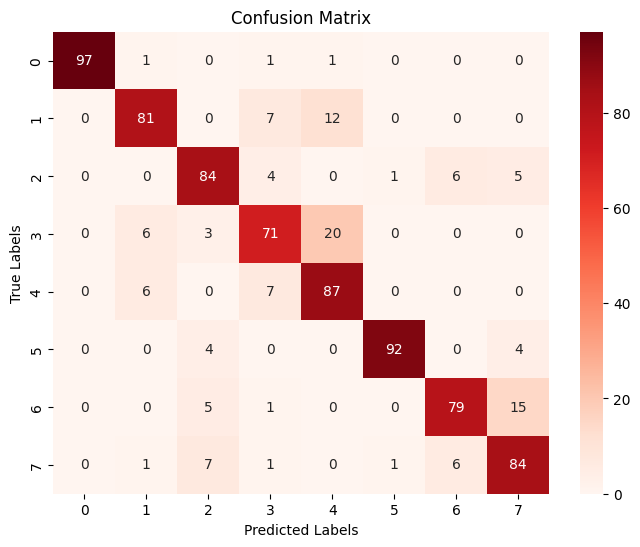

In [51]:
# Plot confusion matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
def plotConfusionMatrix(true_labels, predicted_labels):
    unique_labels = list(set(true_labels + predicted_labels))
    cm = confusion_matrix(true_labels, predicted_labels, labels=unique_labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=unique_labels, yticklabels=unique_labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()
    
class_labels = list(label_encoder.classes_) 
plotConfusionMatrix(list(test_df['label']), preds)

## Task 4: Error Analysis

Perform an error analysis of your predictions from the previous task. To achieve this, select a good number of misclassified articles and manually inspect the article content. Can you identify common patterns that may lead the model to misclassify the texts? Discuss your results.

In [52]:
print(class_labels)

['AP', 'Fox', 'HuffingtonUK', 'HuffingtonUS', 'WP', 'bbc', 'guardian', 'telegraph']


In [53]:
# Error analysis 
# Identify misclassified examples
misclassified_indices = [i for i, (true_label, predicted_label) in enumerate(zip(list(test_df['label']), preds)) if true_label != predicted_label]

# Print a few misclassified examples for manual inspection
for idx in misclassified_indices[:5]:  # Display the first 5 misclassified examples
    print(f"True Label: {class_labels[test_df.iloc[idx]['label']]} | Predicted Label: {class_labels[preds[idx]]}")
    print("Article Text:")
    print(test_df.iloc[idx]['article_text'])
    print("=" * 50)



True Label: guardian | Predicted Label: telegraph
Article Text:
When a doctor MP has an opinion about the NHS, he or she (say, Sarah Wollaston) is usually listened to attentively. The same goes for lawyer MPs, economist MPs, academic MPs on their own special subjects. Political argy-bargy as usual postponed for at least 10 seconds. But journalist MPs – or, more specifically, newspaper columnist MPs? And, beyond that, column-writing prime ministers? These are very deep waters, Watson: a tsunami of chaos.
Nick Cohen prompted 31,800 tweets when he took the plunge here last week. Everything in the week just past posts his thesis on billboards a mile high: enter the pundit, exit any trace of reliability or common sense.
Michael Gove is an Aberdeen Press and Journal man who went on to columnise for the Times. He’s married to Sarah Vine, who writes a column for the Mail. Boris Johnson’s main job through life has been words on paper. He still takes £250,000-plus from the Telegraph for his week